In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ola_small2.csv')

In [ ]:
df.head()

,Unnamed: 0,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,867855,867855,2,231,234,2.06,0.5,1.72,04/06/2017 02:53:22 PM,04/06/2017 03:05:46 PM,2,0.0,1,1,N,0,0.3,12.36
1,945840,945840,1,262,43,0.00,0.5,2.00,04/04/2017 11:08:13 AM,04/04/2017 11:22:48 AM,1,0.0,2,1,N,0,0.3,11.8
2,200035,200035,1,231,125,1.45,0.5,0.60,04/05/2017 09:04:30 AM,04/05/2017 09:09:29 AM,1,0.0,1,1,N,0,0.3,7.25
3,616285,616285,2,13,231,1.45,0.5,0.73,04/06/2017 09:02:25 AM,04/06/2017 09:06:40 AM,1,0.0,1,1,N,0,0.3,7.25
4,751408,751408,1,48,164,1.95,0.5,1.40,04/06/2017 06:45:02 AM,04/06/2017 06:57:00 AM,1,0.0,1,1,N,0,0.3,11.75


In [ ]:
df.shape

(4000, 18)

In [ ]:
df.isna().sum()

Unnamed: 0            0
ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'total_amount'],
      dtype='object')

In [ ]:
df.corr(numeric_only=True)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code
ID,1.000000,-0.002645,-0.005866,0.006696,0.003513,0.011702,0.008935,0.008202,-0.004621,-0.004372
vendor_id,-0.002645,1.000000,-0.034062,0.004250,0.019431,0.017528,0.308691,0.009409,-0.023423,-0.002005
pickup_loc,-0.005866,-0.034062,1.000000,0.114217,-0.033640,-0.091437,-0.025970,-0.034484,0.005347,-0.017287
drop_loc,0.006696,0.004250,0.114217,1.000000,-0.058514,-0.138589,-0.011869,-0.089046,-0.043028,-0.024276
driver_tip,0.003513,0.019431,-0.033640,-0.058514,1.000000,0.511204,-0.043084,0.453692,-0.459410,0.376335
distance,0.011702,0.017528,-0.091437,-0.138589,0.511204,1.000000,-0.023517,0.627119,-0.047869,0.392302
num_passengers,0.008935,0.308691,-0.025970,-0.011869,-0.043084,-0.023517,1.000000,-0.017419,0.024535,-0.020614
toll_amount,0.008202,0.009409,-0.034484,-0.089046,0.453692,0.627119,-0.017419,1.000000,-0.055761,0.296851
payment_method,-0.004621,-0.023423,0.005347,-0.043028,-0.459410,-0.047869,0.024535,-0.055761,1.000000,0.011246
rate_code,-0.004372,-0.002005,-0.017287,-0.024276,0.376335,0.392302,-0.020614,0.296851,0.011246,1.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='distance', ylabel='driver_tip'>

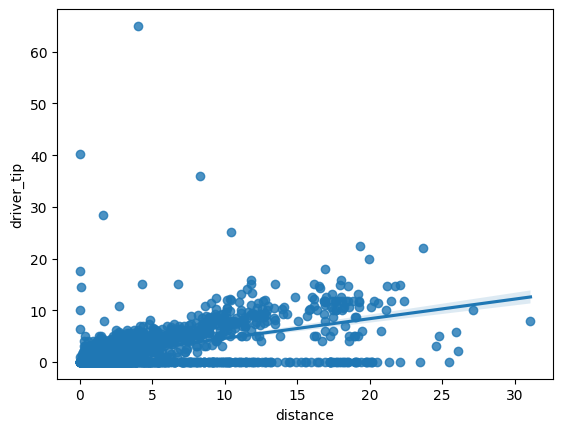

In [ ]:
sns.regplot(x ='distance', y = 'driver_tip', data=df)

In [ ]:
df.dtypes

ID                      int64
vendor_id               int64
pickup_loc              int64
drop_loc                int64
driver_tip            float64
mta_tax                object
distance              float64
pickup_time            object
drop_time              object
num_passengers          int64
toll_amount           float64
payment_method          int64
rate_code               int64
stored_flag            object
extra_charges          object
improvement_charge     object
total_amount           object
dtype: object

In [ ]:
df['total_amount'] = df['total_amount'].astype('float')

ValueError: could not convert string to float: '+AC0-3.8'

In [ ]:
indices_que_quiero_borrar = df['total_amount'].str.contains('\+A')
df = df[~indices_que_quiero_borrar]

In [ ]:
df['total_amount'] = df['total_amount'].astype('float')

In [ ]:
df.shape

(3997, 17)

In [ ]:
df.corr(numeric_only=True)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,total_amount
ID,1.000000,-0.002630,-0.005756,0.006792,0.003503,0.011699,0.008928,0.008198,-0.004564,-0.004297,0.016279
vendor_id,-0.002630,1.000000,-0.034382,0.003911,0.019906,0.018044,0.309145,0.009568,-0.026372,-0.003488,0.020609
pickup_loc,-0.005756,-0.034382,1.000000,0.113941,-0.033429,-0.091242,-0.025820,-0.034416,0.004119,-0.017862,-0.069137
drop_loc,0.006792,0.003911,0.113941,1.000000,-0.058284,-0.138380,-0.011696,-0.088978,-0.044717,-0.024912,-0.114251
driver_tip,0.003503,0.019906,-0.033429,-0.058284,1.000000,0.511025,-0.043335,0.453664,-0.460405,0.379554,0.701420
distance,0.011699,0.018044,-0.091242,-0.138380,0.511025,1.000000,-0.023785,0.627134,-0.045951,0.395784,0.893438
num_passengers,0.008928,0.309145,-0.025820,-0.011696,-0.043335,-0.023785,1.000000,-0.017501,0.026134,-0.019971,-0.029747
toll_amount,0.008198,0.009568,-0.034416,-0.088978,0.453664,0.627134,-0.017501,1.000000,-0.055437,0.298858,0.658031
payment_method,-0.004564,-0.026372,0.004119,-0.044717,-0.460405,-0.045951,0.026134,-0.055437,1.000000,0.002649,-0.137169
rate_code,-0.004297,-0.003488,-0.017862,-0.024912,0.379554,0.395784,-0.019971,0.298858,0.002649,1.000000,0.556029


<Axes: xlabel='distance', ylabel='total_amount'>

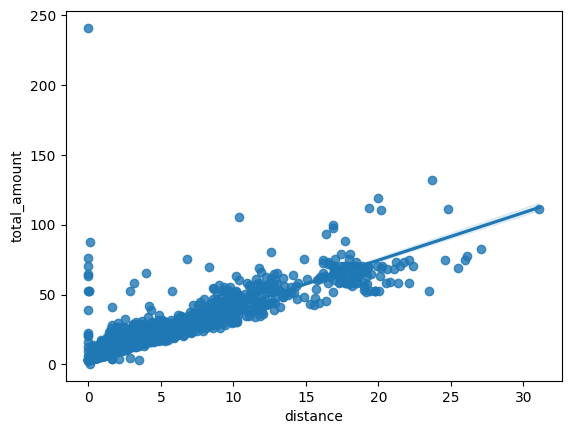

In [ ]:
sns.regplot(y='total_amount',x='distance',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
X = df[['distance','toll_amount','rate_code']]
y = df['total_amount']

In [ ]:
X.head(2)

,distance,toll_amount,rate_code
0,1.72,0.0,1
1,2.00,0.0,1


In [ ]:
y

0       12.36
1       11.80
2        7.25
3        7.25
4       11.75
        ...  
3995    17.30
3996    46.86
3997    23.30
3998    18.50
3999    13.55
Name: total_amount, Length: 3997, dtype: float64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)


In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
preds = model.predict(X_val)

In [ ]:
preds[0:15]

array([ 7.07132551,  6.90564238,  9.33189988,  9.27413248, 18.12599167,
        7.07132551, 57.1878    , 20.28765159,  8.41857106, 11.17523833,
       10.1279067 ,  8.43064825, 25.553     ,  8.59255577, 43.34606667])

In [ ]:
y_val[0:15]

3336     7.25
3568     5.76
1495    11.16
2370     7.56
1353    17.16
1204     6.80
3877    51.07
1952    17.30
3485     8.80
914     12.80
623      8.30
3576     6.30
3288    29.75
2269    12.30
1630    36.66
Name: total_amount, dtype: float64

In [ ]:
modelos = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
  modelos[i].fit(X_train,y_train)

  print(f'{modelos[i]} : ')

  train_preds = modelos[i].predict(X_train)
  print('Error de entrenamiento: ', mae(y_train,train_preds))

  val_preds = modelos[i].predict(X_val)
  print('Error de validacion: ', mae(y_val,val_preds))
  print("\n\n")

LinearRegression() : 
Error de entrenamiento:  2.9595506528803406
Error de validacion:  2.7050501790593207



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Error de entrenamiento:  2.1326528757946694
Error de validacion:  2.5954144352912905



Lasso() : 
Error de entrenamiento:  3.11236759296111